In [1]:
import pandas as pd

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
% matplotlib inline

In [4]:
filename = 'billboard_lyrics_1964-2015.csv'
df = pd.read_csv(filename, encoding='latin-1' )

In [5]:
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [6]:
df.dtypes

Rank        int64
Song       object
Artist     object
Year        int64
Lyrics     object
Source    float64
dtype: object

In [7]:
df.shape

(5100, 6)

In [8]:
print(df['Artist'].nunique())
df['Artist'].value_counts()

2473


madonna                                      35
elton john                                   26
mariah carey                                 25
michael jackson                              22
stevie wonder                                22
janet jackson                                22
taylor swift                                 19
whitney houston                              19
rihanna                                      19
kelly clarkson                               17
the beatles                                  17
pink                                         17
britney spears                               16
the black eyed peas                          16
chicago                                      15
aretha franklin                              14
rod stewart                                  14
usher                                        14
katy perry                                   14
boyz ii men                                  13
kool  the gang                          

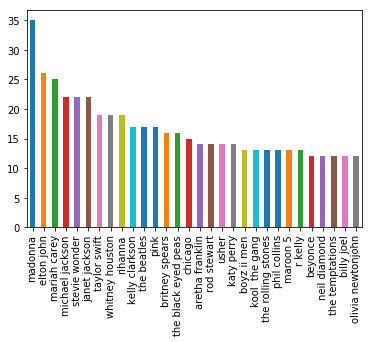

In [9]:
df['Artist'].value_counts()[:30].plot('bar')

In [10]:
artist_name = 'the killers'
artistSongs = df[df['Artist'] == artist_name]
artistSongs

,Rank,Song,Artist,Year,Lyrics,Source
4015,16,mr brightside,the killers,2005,coming out of my cage and ive been doing just...,1.0


In [11]:
my_song = str(artistSongs['Lyrics'].values[0])
my_song

' coming out of my cage and ive been doing just fine gotta gotta be down because i want it all it started out with a kiss how did it end up like this it was only a kiss it was only a kiss now im falling asleep and shes calling a cab while hes having a smoke and shes taking a drag now theyre going to bed and my stomach is sick and its all in my head but shes touching his chest now he takes off her dress now letting me go    memory  byamandah   editor    have you guys seen this after the passing of an outstanding gent by the name of ger farmer foley in county kerry ireland his friends gathered at a pub and    see all   i just cant look its killing me and taking control jealousy turning saints into the sea swimming through sick lullabies choking on your alibis but its just the price i pay destiny is calling me open up my eager eyes cause im mr brightsideim coming out of my cage and ive been doing just fine gotta gotta be down because i want it all it started out with a kiss how did it end

### NLTK

In [12]:
import nltk
from nltk import FreqDist

In [13]:
data = nltk.word_tokenize(my_song)
fdist=FreqDist(data)
print(fdist)
print(fdist.most_common(100))


<FreqDist with 122 samples and 321 outcomes>
[('and', 13), ('a', 13), ('i', 10), ('it', 10), ('my', 8), ('now', 8), ('just', 6), ('kiss', 6), ('shes', 6), ('its', 6), ('me', 6), ('the', 6), ('all', 5), ('out', 4), ('of', 4), ('got', 4), ('ta', 4), ('up', 4), ('was', 4), ('only', 4), ('im', 4), ('calling', 4), ('taking', 4), ('is', 4), ('sick', 4), ('but', 4), ('never', 4), ('this', 3), ('in', 3), ('his', 3), ('coming', 2), ('cage', 2), ('ive', 2), ('been', 2), ('doing', 2), ('fine', 2), ('be', 2), ('down', 2), ('because', 2), ('want', 2), ('started', 2), ('with', 2), ('how', 2), ('did', 2), ('end', 2), ('like', 2), ('falling', 2), ('asleep', 2), ('cab', 2), ('while', 2), ('hes', 2), ('having', 2), ('smoke', 2), ('drag', 2), ('theyre', 2), ('going', 2), ('to', 2), ('bed', 2), ('stomach', 2), ('head', 2), ('touching', 2), ('chest', 2), ('he', 2), ('takes', 2), ('off', 2), ('her', 2), ('dress', 2), ('letting', 2), ('cant', 2), ('look', 2), ('killing', 2), ('control', 2), ('jealousy', 2), 

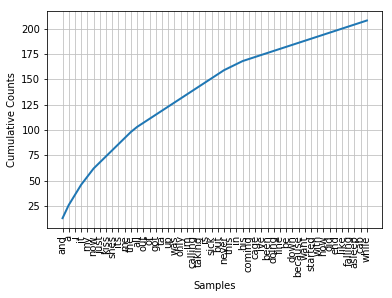

In [14]:
# pd.DataFrame(fdist.most_common(100)).plot('bar')
fdist.plot(50, cumulative=True)

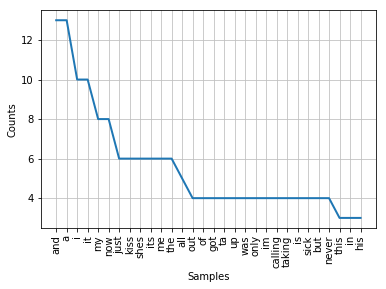

In [15]:
fdist.plot(30, cumulative=False)

In [16]:
# Example : Tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize

example_test = "First Step in NLTK is tokenizer. tokenizer means divide text data \
into tokens. Here, token means single Entity that is split by any rule for example \
sentence from paragraph."

print(sent_tokenize(example_test))
print("----------------------------------------------")
print(word_tokenize(example_test))


['First Step in NLTK is tokenizer.', 'tokenizer means divide text data into tokens.', 'Here, token means single Entity that is split by any rule for example sentence from paragraph.']
----------------------------------------------
['First', 'Step', 'in', 'NLTK', 'is', 'tokenizer', '.', 'tokenizer', 'means', 'divide', 'text', 'data', 'into', 'tokens', '.', 'Here', ',', 'token', 'means', 'single', 'Entity', 'that', 'is', 'split', 'by', 'any', 'rule', 'for', 'example', 'sentence', 'from', 'paragraph', '.']


In [17]:
from nltk.tokenize import sent_tokenize, word_tokenize

print(sent_tokenize(my_song))  # I don't have good results here because the lyrics 

print("----------------------------------------------")
print(word_tokenize(my_song))


[' coming out of my cage and ive been doing just fine gotta gotta be down because i want it all it started out with a kiss how did it end up like this it was only a kiss it was only a kiss now im falling asleep and shes calling a cab while hes having a smoke and shes taking a drag now theyre going to bed and my stomach is sick and its all in my head but shes touching his chest now he takes off her dress now letting me go    memory  byamandah   editor    have you guys seen this after the passing of an outstanding gent by the name of ger farmer foley in county kerry ireland his friends gathered at a pub and    see all   i just cant look its killing me and taking control jealousy turning saints into the sea swimming through sick lullabies choking on your alibis but its just the price i pay destiny is calling me open up my eager eyes cause im mr brightsideim coming out of my cage and ive been doing just fine gotta gotta be down because i want it all it started out with a kiss how did it en

In [18]:
# Removing Stop Words 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words("english"))
# print(stop_words)

words = word_tokenize(my_song)
filter_sentence = []
filter_sentence.append([w for w in words if w not in stop_words])
print(filter_sentence)

[['coming', 'cage', 'ive', 'fine', 'got', 'ta', 'got', 'ta', 'want', 'started', 'kiss', 'end', 'like', 'kiss', 'kiss', 'im', 'falling', 'asleep', 'shes', 'calling', 'cab', 'hes', 'smoke', 'shes', 'taking', 'drag', 'theyre', 'going', 'bed', 'stomach', 'sick', 'head', 'shes', 'touching', 'chest', 'takes', 'dress', 'letting', 'go', 'memory', 'byamandah', 'editor', 'guys', 'seen', 'passing', 'outstanding', 'gent', 'name', 'ger', 'farmer', 'foley', 'county', 'kerry', 'ireland', 'friends', 'gathered', 'pub', 'see', 'cant', 'look', 'killing', 'taking', 'control', 'jealousy', 'turning', 'saints', 'sea', 'swimming', 'sick', 'lullabies', 'choking', 'alibis', 'price', 'pay', 'destiny', 'calling', 'open', 'eager', 'eyes', 'cause', 'im', 'mr', 'brightsideim', 'coming', 'cage', 'ive', 'fine', 'got', 'ta', 'got', 'ta', 'want', 'started', 'kiss', 'end', 'like', 'kiss', 'kiss', 'im', 'falling', 'asleep', 'shes', 'calling', 'cab', 'hes', 'smoke', 'shes', 'taking', 'drag', 'theyre', 'going', 'bed', 'stom

In [32]:
# Lematization 

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

# exa = word_tokenize(filter_sentence)
stem_sentence = []
for w in filter_sentence[0]:
    stemText = ps.stem(w)
    stem_sentence.append(stemText)


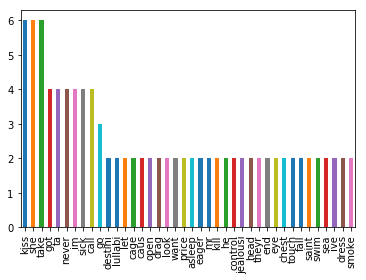

In [38]:
mostCommonPhrases = pd.DataFrame(stem_sentence, columns=['words'])
mostCommonPhrases['words'].value_counts()[:40].plot('bar')

In [51]:
import random
people = ['Ori', 'Anita', 'Rodri', 'Moni', 'Nathaly']
random.sample(people, 5)

['Moni', 'Anita', 'Nathaly', 'Ori', 'Rodri']